In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/data science/marketprophecy-main/NSE Data')

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [29]:
data= pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')
test=pd.read_csv('NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv')

In [30]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [31]:
print(data.shape)
print(test.shape)

(1481, 7)
(23, 7)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [33]:
data.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [34]:
data[data.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
151,2016-08-12,NaN,NaN,NaN,NaN,NaN,NaN
493,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
739,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
937,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN
1201,2020-11-14,NaN,NaN,NaN,NaN,NaN,NaN
1233,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data["Date"]=pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index=data['Date']

In [36]:
data.dropna(inplace=True)
print(data.shape)
print(data.isnull().sum())

(1475, 7)
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


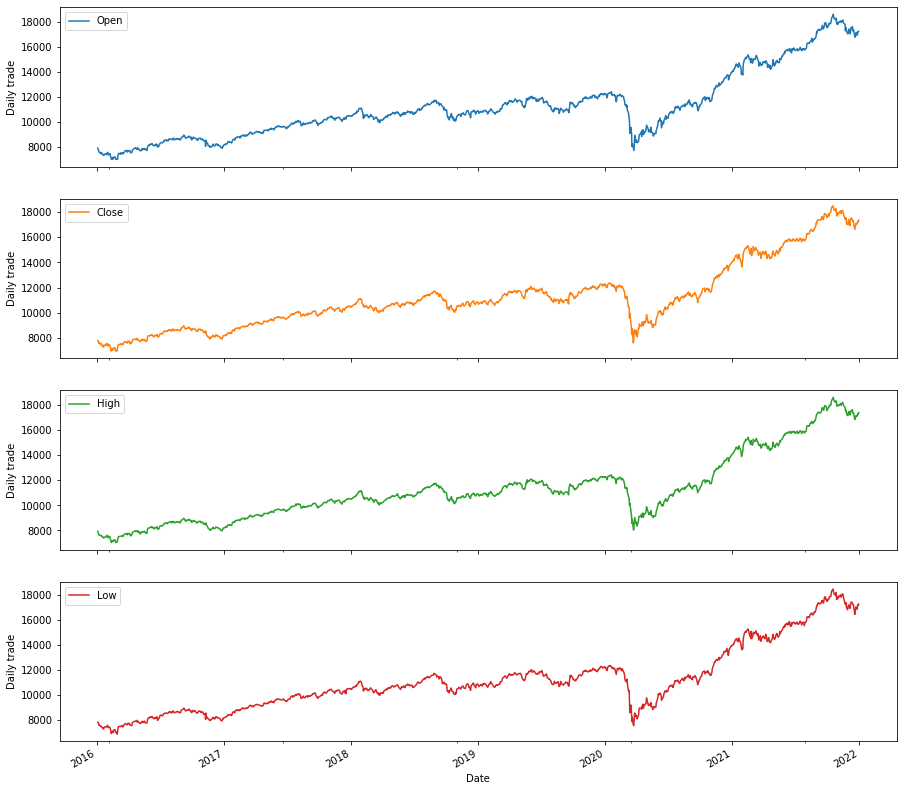

In [37]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = data[cols_plot].plot(figsize=(15, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

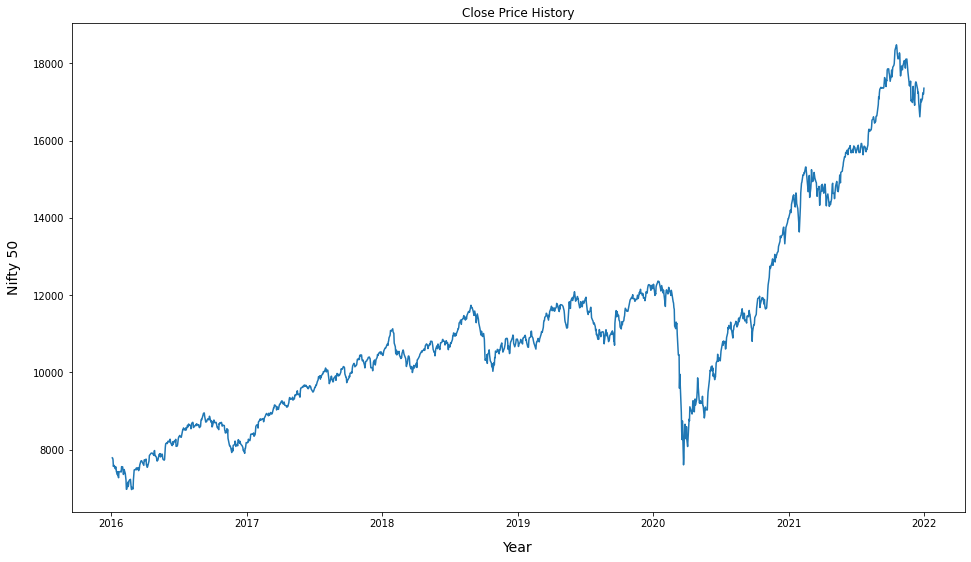

In [38]:
plt.figure(figsize=(16,9))
plt.plot(data['Close'])
plt.title('Close Price History')
plt.xlabel('Year',fontsize=14,labelpad=12)
plt.ylabel('Nifty 50',fontsize=14,labelpad=12)
plt.show()

In [39]:
# Create a new dataframe with only the 'Close column 
new_data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = new_data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len



1328

In [40]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler1.fit_transform(dataset)

scaled_data

array([[0.07132518],
       [0.07074726],
       [0.06695374],
       ...,
       [0.89019627],
       [0.88935758],
       [0.90240257]])

In [41]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [122]:
from keras.backend import dropout
model= Sequential()
model.add(LSTM(250,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(125,return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Dense(1))

In [123]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [130]:
model.fit(x_train,y_train,batch_size=7,epochs=10)

Epoch 1/10
182/182 [==============================] - 2s 9ms/step - loss: 7.1453e-04
Epoch 2/10
182/182 [==============================] - 2s 9ms/step - loss: 6.3314e-04
Epoch 3/10
182/182 [==============================] - 2s 9ms/step - loss: 4.8245e-04
Epoch 4/10
182/182 [==============================] - 2s 9ms/step - loss: 6.0656e-04
Epoch 5/10
182/182 [==============================] - 2s 9ms/step - loss: 5.7241e-04
Epoch 6/10
182/182 [==============================] - 2s 9ms/step - loss: 6.4514e-04
Epoch 7/10
182/182 [==============================] - 2s 9ms/step - loss: 5.6631e-04
Epoch 8/10
182/182 [==============================] - 2s 9ms/step - loss: 5.2574e-04
Epoch 9/10
182/182 [==============================] - 2s 9ms/step - loss: 5.9740e-04
Epoch 10/10
182/182 [==============================] - 2s 9ms/step - loss: 6.1208e-04


In [131]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler1.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(np.power((predictions - y_test), 2)))
rmse

142.3208782167349

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


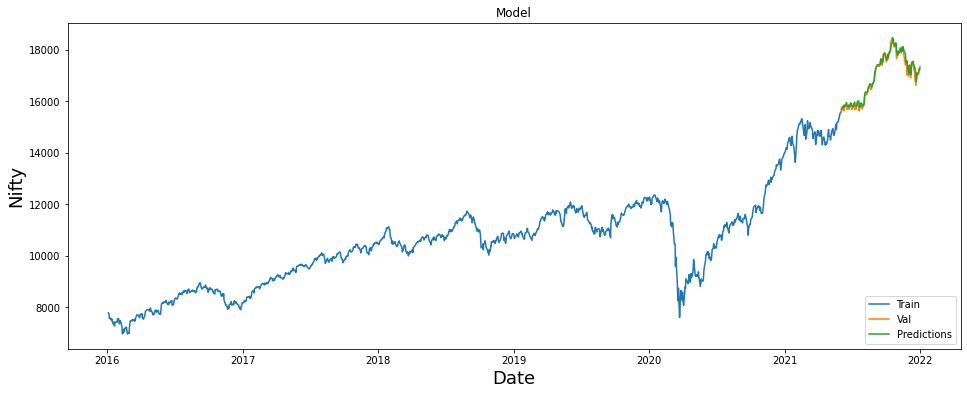

In [132]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Nifty', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [133]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300


###For testing data first value we need last 60 value of train data

In [134]:
past_60_days=data.tail(60)

final_df=past_60_days.append(test)

In [135]:
final=final_df['Close']
final.reset_index(drop=True, inplace=True)
final=np.array(final).reshape(-1,1)

In [136]:
# Create the training data set 
final1=scaler1.transform(final)

# Split the data into x_train and y_train data sets
input_x = []
y_test = []

for i in range(60, len(final1)):
    input_x.append(final1[i-60:i, 0])
    y_test.append(final1[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
input_x, y_test = np.array(input_x), np.array(y_test)

# Reshape the data
input_x = np.reshape(input_x, (input_x.shape[0], input_x.shape[1], 1))


In [137]:
# Get the models predicted price values 
predictions = model.predict(input_x)

predictions = scaler1.inverse_transform(predictions)
y_test = scaler1.inverse_transform(y_test.reshape(-1,1))
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(np.power((predictions - y_test), 2)))
rmse

202.07512679083166